# 基于概率论的朴素贝叶斯分类方法

朴素贝叶斯法是基于贝叶斯定理与特征条件独立假设的分类方法。**最为广泛的两种分类模型是决策树模型(Decision Tree Model)和朴素贝叶斯模型（Naive Bayesian Model，NBM）**，本文主要讨论朴素贝叶斯模型。我们称之为“朴素”，是因为整个形式化过程只做最原始、最简单的假设。

和决策树模型相比，朴素贝叶斯分类器(Naive Bayes Classifier,或 NBC)发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率。同时，NBC模型**所需估计的参数很少，对缺失数据不太敏感，算法也比较简单**。理论上，NBC模型与其他分类方法相比具有最小的误差率。但是实际上并非总是如此，这是因为NBC模型假设属性之间相互独立，这个假设在实际应用中往往是不成立的，这给NBC模型的正确分类带来了一定影响。

## 概率与朴素贝叶斯分类器

### 基础知识

设输入空间$X \subseteq R^n$为n维向量的集合，输出空间为类标记集合$Y=\lbrace c_1,c_2,\cdots,c_K\rbrace$。输入为特征向量$x\in X$，输出为类标记$y\in Y$。$X$是定义在输入空间的随机向量，$Y$是定义在输出空间的随机变量。$P(X,Y)$是X和Y的联合概率分布。训练集为：$$T=\lbrace (x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\rbrace$$由$P(X,Y)$独立同分布产生。

朴素贝叶斯法通过训练数据集学习联合概率分布$P(X,Y)$。具体地，学习以下先验概率和条件概率分布。**先验概率**分布：$$P(Y=c_k),k=1,2,\cdots,K$$**条件概率分布**：
$$P(X=x|Y=c_k)=P(X^{(1)}=x^{(1)},\cdots,X^{(n)}=x^{(n)}|Y=c_k),k=1,2,\cdots,K\tag 1$$
于是，学习到了联合概率分布$P(X,Y)=P(Y)P(X|Y)$。其中，$x^{(i)}$表示特征向量$x$的第$i$个特征。

条件概率分布$P(X=x|Y=c_k)$有指数级数量的参数，其估计实际是不可行的。事实上，假设$x^{(j)}$可取值有$S_j$个，$j=1,2,\dots,n$，$Y$可取值有$K$个，那么参数个数为$K\prod _{j=1}^ns_j$。


因此，朴素贝叶斯对条件概率做了**条件独立性假设**，即输入特征之间独立或者不相关，这个假设性约束较强，使得朴素贝叶斯变得简单，朴素贝叶斯也因此得名，但有时会牺牲一定的分类准确性。由于独立性假设存在，上述公式（1）可以表示为：
$$\begin{eqnarray*}
P(X=x|Y=c_k)&=&P(X^{(1)}=x^{(1)},\cdots,X^{(n)}=x^{(n)}|Y=c_k)\\
&=&\prod_{j=1}^nP(X^{(j)}=x^{(j)}|Y=c_k)   
\end{eqnarray*}\tag 2$$条件概率是指事件X在另外一个事件Y已经发生条件下的发生概率，用P(X|Y)表示。通常，事件X在事件Y(发生)的条件下的概率，与事件Y在事件X的条件下的概率是不一样的。但是，这两者是有确定关系的，**贝叶斯定理**就描述了这种关系，即当事件X和Y同时发生的时候，有公式：$$P(XY)=P(X)P(Y|X)=P(Y)P(X|Y)$$
由这种特定关系，得出**贝叶斯公式**：$$P(Y|X)=\cfrac{P(Y)P(X|Y)}{P(X)}$$其中，$P(Y)$是事件Y发生的概率，即**先验概率**；$P(X|Y)$是样本X相对于类标记Y的**条件概率**，或称为**似然概率**；$P(X)$一般是归一化后的**“证据”**，是事件X发生的概率；$P(Y|X)$是**后验概率**。

根据贝叶斯公式：在事件X发生的条件下事件Y发生的概率为P(Y|X)，即后验概率，也即，输入一个样本x，属于Y中某个分类$c_k$的概率。**朴素贝叶斯算法针对的是多元分类问题，需要求解的就是后验概率**。

朴素贝叶斯分类时，对给定输入$x$，多元表示为$(x^{(1)},x^{(2)},\cdots,x^{(n)})$，根据贝叶斯公式，朴素贝叶斯分类是计算$x$每一类的后验概率，公式为：$$P(Y=c_k|X=x)=\cfrac{P(Y=c_k)P(X=x|Y=c_k)}{\sum_kP(Y=c_k)P(X=x|Y=c_k)}   \tag 3$$公式的分母部分是**全概率公式**的展开。

将公式2带入公式3，
有：$$P(Y=c_k|X=x)=\cfrac{P(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)}{\sum_kP(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)}   \tag 4$$

根据公式4，求出输入x属于每一类的后验概率，**后验概率最大者**即为输入x所属的分类。因此，朴素贝叶斯分类算法可表示为：$$y=f(x)=argmax_{c_k}\cfrac{P(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)}{\sum_kP(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)}$$由于分母对所有的$c_k$都相同，在不影响分类结果的情况下，可以简化为下式：$$y=argmax_{c_k}P(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k) \tag 5$$

### 后验概率最大化

朴素贝叶斯分类算法将实例x分到后验概率最大的类。这等价于期望风险最小化。
假设使用0-1损失函数： $$L(Y,f(X))=\left\{\begin{array}{cc} 
		1, Y\not=f(X)\\ 
		0, Y= f(X)&  
	\end{array}\right.$$上述f为决策分类函数。期望风险为：$$R_{exp}(f)=E[L(Y,f(X))]$$此期望是对联合分布$P(X,Y)$取的，由此，取条件期望：$$R_{exp}(f)=E_X\sum_{k=1}^K[L(c_k,f(X))]P(c_k|X)$$为了使得期望风险最小，只需要对$X=x$逐个极小化，由此得到：$$f(x)=argmin_{y\in Y}\sum_{k=1}^KL(c_k,y)P(c_k|X=x)$$其中$(c_1,c_2,...,c_K)$为输出空间，即所有可能的输出；$y$为**分类决策函数**的输出，设$y=c_k$，即决策函数的输出为类别$c_k$，则$L(c_k,y)=0$,而$L(c_1,y),...L(c_{k−1},y),L(c_{k+1},y),...,L(c_K,y)$均等于1（使用0-1损失函数），这样，上面的公式可以进行如下化简：    
    $$\begin{eqnarray*}
    f(x)&=&argmin_{y\in Y}\sum_{k=1}^KL(c_k,y)P(c_k|X=x)\\
    &=&argmin_{y\in Y}\sum_{k=1}^KP(c_k\neq y|X=x)\\
    &=&argmin_{y\in Y}(1-P(c_k = y|X=x))
    \end{eqnarray*}$$$$=argmax_{y\in Y}P(c_k=y|X=x)$$通过以上推导，根据期望风险最小化得到后验概率最大化：$$f(x)=argmax_{c_k}P(c_k|X=x)$$**后验概率越大，说明某事物属于这个类别的可能性越大，我们越有理由把它归到这个类别下，这就是朴素贝叶斯所采用的原理**。

### 连续型特征属性和零概率事件处理

上述内容中的特征属性值都是离散的，如果特征属性值是不是离散的，而是连续的呢？

一种可能的办法是**离散化**。最简单的技巧是把某属性的原始域一分为二，比如年龄，“老”定义为60岁及以上为真，其它为假。这里有一部分信息会丢失，如90岁的老人比65岁的老人年纪更大。如果把原始域分为更多区间，而不是两个，这种损失就会得到缓解。此时，每个区间是属性值取值范围，对应的值是落入区间样本数的百分比，当区间数更多更细的时候，就得到**概率密度函数pdf**。

当特征属性为连续值时，通常假定属性值服从高斯分布（也称**正态分布**）。即：$$g(x,\eta,\sigma)=\cfrac{1}{\sqrt{2\pi}\sigma}e^{-\cfrac{(x-\eta)^2}{2\sigma^2}}$$而$$P(a_k|y_i)=g(a_k,\eta_{y_i},\sigma_{y_i})$$因此只要计算出训练样本某属性的均值和标准差，代入上述公式即可得到需要的估计值。（$a_k$为观察到的属性值）
      
另一个需要讨论的问题就是当$P(a|y)=0$如何处理。当某个类别下某个特征项划分没有出现时，就是产生这种现象，这会令分类器质量大大降低。为了解决这个问题，引入了**拉普拉斯校准**，它的思想非常简单，就是对没类别下所有划分（概率为零的）的计数加1，这样如果训练样本集数量充分大时，并不会对结果产生影响，并且解决了上述频率为零的尴尬局面。
 

### 朴素贝叶斯分类评价

**优点**：朴素贝叶斯算法假设了数据集属性之间具有**相互独立性**，因此算法的逻辑性十分简单，并且算法较为稳定，当数据呈现不同的特点时，朴素贝叶斯的分类性能不会有太大的差异。换句话说就是朴素贝叶斯算法的健壮性比较好，对于不同类型的数据集不会呈现出太大的差异性。当数据集属性之间的关系相对比较独立时，朴素贝叶斯分类算法会有较好的效果。

**缺点**：属性独立性的条件同时也是朴素贝叶斯分类器的不足之处。数据集属性的独立性在很多情况下是很难满足的，因为数据集的属性之间往往都存在着相互关联，如果在分类过程中出现这种问题，会导致分类的效果大大降低。

## 朴素贝叶斯西瓜分类案例

### 案例计算

以大家熟悉的西瓜作为案例（离散值），计算各种概率。运行下面代码，显示西瓜数据。

In [21]:
import numpy as np
import pandas as pd
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

#读取指定索引字段值
csv_data=pd.read_csv(".\DataSet\watermelon_3.csv",encoding='gbk',usecols=['色泽','根蒂','敲声','纹理','脐部','触感','好瓜'])
csv_data

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,青绿,硬挺,清脆,清晰,平坦,软粘,否


首先计算类先验概率，显然有：$$P(好瓜=是)=\cfrac{8}{17}=0.471$$$$P(好瓜=否)=\cfrac{9}{17}=0.529$$

然后为每个属性计算条件概率：$$P_{青绿|是}=P\lbrace色泽=青绿|好瓜=是\rbrace=\cfrac{3}{8}=0.375$$$$P_{青绿|否}=P\lbrace色泽=青绿|好瓜=否\rbrace=\cfrac{3}{9}=0.333$$$$P_{卷缩|是}=P\lbrace根蒂=卷缩|好瓜=是\rbrace=\cfrac{5}{8}=0.625$$$$P_{卷缩|否}=P\lbrace根蒂=卷缩|好瓜=否\rbrace=\cfrac{3}{9}=0.333$$$$P_{浊响|是}=P\lbrace敲声=浊响|好瓜=是\rbrace=\cfrac{6}{8}=0.750$$$$P_{浊响|否}=P\lbrace敲声=浊响|好瓜=否\rbrace=\cfrac{4}{9}=0.444$$$$P_{清晰|是}=P\lbrace纹理=清晰|好瓜=是\rbrace=\cfrac{7}{8}=0.875$$$$P_{清晰|否}=P\lbrace纹理=清晰|好瓜=否\rbrace=\cfrac{2}{9}=0.222$$$$P_{凹陷|是}=P\lbrace脐部=凹陷|好瓜=是\rbrace=\cfrac{6}{8}=0.750$$$$P_{凹陷|否}=P\lbrace脐部=凹陷|好瓜=否\rbrace=\cfrac{2}{9}=0.222$$$$P_{硬滑|是}=P\lbrace触感=硬滑|好瓜=是\rbrace=\cfrac{6}{8}=0.750$$$$P_{硬滑|否}=P\lbrace触感=硬滑|好瓜=否\rbrace=\cfrac{6}{9}=0.667$$

**假设测试样本属性为（青绿、卷缩、浊响、清晰、凹陷、硬滑）**，按照公式 3计算分子部分$P(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)$：$$P(好瓜=是)\times P_{青绿|是}\times P_{卷缩|是}\times P_{浊响|是}\times P_{凹陷|是}\times P_{硬滑|是}=0.471\times0.375\times0.625\times0.750\times0.875\times0.750\times0.750=0.04075$$
$$P(好瓜=否)\times P_{青绿|否}\times P_{卷缩|否}\times P_{浊响|否}\times P_{凹陷|否}\times P_{硬滑|否}=0.529\times0.333\times0.333\times0.444\times0.222\times0.222\times0.667=0.0008562$$只有两个类别，上述两个值比较，0.04075比较大，因此，**将本测试案例归于“好瓜=是”类别**。

将色泽属性变为“乌黑”，产生一个新的样本：（乌黑、卷缩、浊响、清晰、凹陷、硬滑）。$$P_{乌黑|是}=P\lbrace色泽=乌黑|好瓜=是\rbrace=\cfrac{4}{8}=0.500$$$$P_{乌黑|否}=P\lbrace色泽=乌黑|好瓜=否\rbrace=\cfrac{2}{9}=0.222$$
按照公式 3计算分子部分$P(Y=c_k)\prod_{j=1}P(X^{(j)}=x^{(j)}|Y=c_k)$：$$P(好瓜=是)\times P_{乌黑|是}\times P_{卷缩|是}\times P_{浊响|是}\times P_{凹陷|是}\times P_{硬滑|是}=0.471\times0.500\times0.625\times0.750\times0.875\times0.750\times0.750=0.05433$$
$$P(好瓜=否)\times P_{乌黑|否}\times P_{卷缩|否}\times P_{浊响|否}\times P_{凹陷|否}\times P_{硬滑|否}=0.529\times0.222\times0.333\times0.444\times0.222\times0.222\times0.667=0.0005708$$同样，0.05433比较大，因此，**将本测试案例归于“好瓜=是”类别**。

### 拉普拉斯修正

若某个属性值在训练集中没有与某个类同时出现过，其条件概率将为0。如$$P_{清脆|是}=P\lbrace敲声=清脆|好瓜=是\rbrace=\cfrac{0}{8}=0$$此时，无论其它属性是什么值，都将归类为“好瓜=否”。为了避免0值“抹去”其它属性的值，在估计概率值时要进行“平滑”，常采用**“拉普拉斯修正”**，避免因训练样本不充分而导致概率估计为零的问题。具体来说，令N是训练集D中可能的类别数量，$N_i$表示第i个属性可能取值的数量，则$$P(Y=c_k)=\cfrac{|D_{c_k}|+1}{|D|+N}$$$$P(X^{(j)}=x^{(j)}|Y=c_k)=\cfrac{|D_{c_k,x^{(j)}}|+1}{|D_c|+N_i} \tag 6$$

$|D|$：样本数量，$|D_{c_k}|$：k类的样本数量，$|D_{c_k,x^{(j)}}|$:类别$c_k$中属性为$x^{(j)}$的数量.针对本例，则有：$$P(好瓜=是)=\cfrac{8+1}{17+2}=0.474$$$$P(好瓜=否)=\cfrac{9+1}{17+2}=0.526$$类似地$$P_{青绿|是}=P\lbrace色泽=青绿|好瓜=是\rbrace=\cfrac{3+1}{8+3}=0.364$$$$P_{青绿|否}=P\lbrace色泽=青绿|好瓜=否\rbrace=\cfrac{3+1}{9+3}=0.333$$同样$$P_{清脆|是}=P\lbrace敲声=清脆|好瓜=是\rbrace=\cfrac{0+1}{8+3}=0.091$$

### 朴素贝叶斯分类算法
综上所述，给出朴素贝叶斯分类算法。

输入：训练数据$T=\lbrace (x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\rbrace$，实例$x$

输出：实例$x$的类别

（1）计算先验概率$P(Y=c_k)$，及条件概率$P(X=x^{(j)}|Y=c_k)$

（2）对于给定的实例$x$，按照公式5计算属于每一类的概率

（3）选择最大后验概率，确定$x$的类别。

## 算法手工实现与测试：西瓜数据

### 西瓜数据

使用西瓜数据，数据如下图所示，其中增加了2列：密度和含糖量，数据存在当前目录下，文件名为"watermelon_3.csv"。序关系是前一列的数据表示。

In [22]:
#读取指定索引字段值
csv_data=pd.read_csv(".\DataSet\watermelon_3.csv",encoding='gbk',usecols=['编号','色泽','根蒂','敲声','纹理','脐部','触感','密度','含糖率','好瓜','序关系'])
print(csv_data)

    编号  色泽  根蒂  敲声  纹理  脐部  触感     密度    含糖率 好瓜  序关系
0    1  青绿  蜷缩  浊响  清晰  凹陷  硬滑  0.697  0.460  是    1
1    2  乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  0.774  0.376  是    1
2    3  乌黑  蜷缩  浊响  清晰  凹陷  硬滑  0.634  0.264  是    1
3    4  青绿  蜷缩  沉闷  清晰  凹陷  硬滑  0.608  0.318  是    1
4    5  浅白  蜷缩  浊响  清晰  凹陷  硬滑  0.556  0.215  是    1
5    6  青绿  稍蜷  浊响  清晰  稍凹  软粘  0.403  0.237  是    1
6    7  乌黑  稍蜷  浊响  稍糊  稍凹  软粘  0.481  0.149  是    1
7    8  乌黑  稍蜷  浊响  清晰  稍凹  硬滑  0.437  0.211  是    1
8    9  乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  0.666  0.091  否    0
9   10  青绿  硬挺  清脆  清晰  平坦  软粘  0.243  0.267  否    0
10  11  浅白  硬挺  清脆  模糊  平坦  硬滑  0.245  0.057  否    0
11  12  浅白  蜷缩  浊响  模糊  平坦  软粘  0.343  0.099  否    0
12  13  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  0.639  0.161  否    0
13  14  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  0.657  0.198  否    0
14  15  乌黑  稍蜷  浊响  清晰  稍凹  软粘  0.360  0.370  否    0
15  16  浅白  蜷缩  浊响  模糊  平坦  硬滑  0.593  0.042  否    0
16  17  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  0.719  0.103  否    0


首先定义朴素贝叶斯类，里面包含读取数据和分类的函数。

In [23]:
#coding:utf-8
# 极大似然估计  朴素贝叶斯算法
import csv
import numpy as np

class NaiveBayes(object):
    def getTrainSet(self,filename):    
        #读数据，西瓜数据集3.0    
        #返回数据集X 和标签集Y 
        trainData,labels = [], []    
        with open(filename) as f:        
            reader = csv.reader(f)        
            header_row = next(reader)   #取第一行     
            for line in reader:            
                trainData.append(line[1: 9])            
                labels.append(line[9])    
        return trainData,labels

    def classify(self, trainData, labels, features):
        #求labels中每个label的先验概率
        #labels = list(labels)    #转换为list类型
        P_y = {}       #字典，存入label的概率，键值对
        for label in labels:
            P_y[label] = labels.count(label)/float(len(labels))
        print('\n分类先验概率：\n    ',P_y)
        
        #求label与feature同时发生的概率,也即为每个属性计算条件概率
        P_xy = {}
        for y in P_y.keys():
            y_index = [i for i, label in enumerate(labels) if label == y]  # labels中出现y值的所有数值的下标索引
            #print(y_index)
            for j in range(len(features)):      # features[0] 在trainData[:,0]中出现的值的所有下标索引
                x_index = [i for i, feature in enumerate(np.mat(trainData)[:,j]) if feature == features[j]]#需要列表转矩阵
                #print(x_index)
                xy_count = len(set(x_index) & set(y_index))   # set(x_index)&set(y_index)列出两个表相同的元素
                pkey = str(features[j]) + '*' + str(y)
                P_xy[pkey] = xy_count / float(len(labels))
        print("\n为每个属性计算条件概率:\n     ",P_xy)
        
        #求条件概率
        P = {}
        for y in P_y.keys():
            for x in features:
                pkey = str(x) + '|' + str(y)
                P[pkey] = P_xy[str(x)+'*'+str(y)] / float(P_y[y])    #P[X1/Y] = P[X1Y]/P[Y]
        print("\n计算条件概率:\n     ",P)
        
        #测试
        F = {}   #属于各个类别的概率
        for y in P_y:
            F[y] = P_y[y]
            for x in features:
                F[y] = F[y]*P[str(x)+'|'+str(y)]     #P[y/X] = P[X/y]*P[y]/P[X]，分母相等，比较分子即可，所以有F=P[X/y]*P[y]=P[x1/Y]*P[x2/Y]*P[y]
        print("\n属于各个类别的概率:\n     ",F)#P_xy)
        
        features_label = max(F, key=F.get)  #概率最大值对应的类别
        return features_label

说明：

数据在csv的文件中，csv文件格式是一种通用的电子表格和数据库导入导出格式。Python的**csv模块封装了常用的读写文件的功能**。读操作csv.reader(csvfile，dialect ='excel'，** fmtparams)返回一个reader对象，它将迭代给定csvfile中的行。

写操作csv.writer(csvfile，dialect ='excel'，** fmtparams)返回一个编写器对象，负责将用户的数据转换为给定的类文件对象上的分隔字符串。

**enumerate()函数**用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。

In [24]:
if __name__ == '__main__':
    nb = NaiveBayes()# 生成类的实例
    # 训练数据
    trainData, labels = nb.getTrainSet('.\DataSet\watermelon_3.csv')
    features =['青绿','蜷缩','浊响','清晰','凹陷','硬滑']# 测试数据
    result = nb.classify(trainData, labels, features)
    print ('\n',features,'属于',result)


分类先验概率：
     {'是': 0.47058823529411764, '否': 0.5294117647058824}

为每个属性计算条件概率:
      {'青绿*是': 0.17647058823529413, '蜷缩*是': 0.29411764705882354, '浊响*是': 0.35294117647058826, '清晰*是': 0.4117647058823529, '凹陷*是': 0.29411764705882354, '硬滑*是': 0.35294117647058826, '青绿*否': 0.17647058823529413, '蜷缩*否': 0.17647058823529413, '浊响*否': 0.23529411764705882, '清晰*否': 0.11764705882352941, '凹陷*否': 0.11764705882352941, '硬滑*否': 0.35294117647058826}

计算条件概率:
      {'青绿|是': 0.37500000000000006, '蜷缩|是': 0.625, '浊响|是': 0.7500000000000001, '清晰|是': 0.875, '凹陷|是': 0.625, '硬滑|是': 0.7500000000000001, '青绿|否': 0.33333333333333337, '蜷缩|否': 0.33333333333333337, '浊响|否': 0.4444444444444444, '清晰|否': 0.2222222222222222, '凹陷|否': 0.2222222222222222, '硬滑|否': 0.6666666666666667}

属于各个类别的概率:
      {'是': 0.033928366268382366, '否': 0.0008607009333225747}

 ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'] 属于 是


### 手工实现与测试：文本分类数据

#### 文本的向量模型空间
要从文本中获取特征，需要拆分文本。文本拆分后，便得到文本**词条（token）**，然后将每一个文本片段表示为一个**词条向量**，其中值为1表示词条出现在文档中，0表示词条未出现。

通常将这种文本拆分后得到的向量结构称为**向量空间模型**。虽然这种模型具有局限性，但是它任然是文本分类中应用最广泛、最为流行的数据结构。

向量空间模型将文本表示为一个向量，向量中的每个特征表示为文本中出现的词条。通常，将训练集中出现的每个字符串作为一个维度，虽然这样做会导致极高维的空间。

为了减少维，通常会在预处理阶段过滤掉某些字或词，这些词称为**停用词**，还有些语气助词，不起太大作用。有时候也需要过滤掉一些不适合的词语。

下面的代码为文本构造向量空间：

In [25]:
import numpy as np
import jieba 
#创建停用词列表
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    #print(stopwords)
    return stopwords

# 对句子去除停用词
def movestopwords(sentence): 
    #参数为语句按照顺序的列表
    stopwords = stopwordslist('stop_words.txt')  # 这里加载停用词的路径    
    outlist = []#''    
    for word in sentence:        
        if word not in stopwords:
            #if word != '\t'and'\n' and '， ':                
            outlist.append(word)
                # outstr += " "    
    return outlist

def getDataSet():
    docSet=["My dog ate my homework and ate 99 sandwich","My cat仍然 ate the first sandwich and ate the second sandwich","A dolphin and a dog ate the homework","A dog ate my sandwich,dont knick sandwich"]#若干文档
    docClassVec=[0,1,0,1]#文档类别标签
    #可以使用jieba.lcut得到list的分词结果
    docTokenVec=[]
    for doc in docSet:
        #去掉停用词和空格,词条变小写
        aDocVec=movestopwords([x.strip() for x in jieba.lcut(doc.lower()) if x.strip() != ''])
        #print(aDocVec)
        docTokenVec.append(aDocVec)
    return docTokenVec,docClassVec
    
docWords,docLabels=getDataSet()
print(docWords,docLabels)#显示文档词汇、文档标签

[['dog', 'ate', 'homework', 'ate', 'sandwich'], ['cat', 'ate', 'sandwich', 'ate', 'sandwich'], ['a', 'dolphin', 'a', 'dog', 'ate', 'homework'], ['a', 'dog', 'ate', 'sandwich', 'dont', 'knick', 'sandwich']] [0, 1, 0, 1]


这里使用的停用词为网络上的stop_words.txt文件，包含了中英文，从结果来看，可能还没有完全去除停用词。如“my”、“the”、“99”、“and”等词汇已经删除。

下面的代码将文档转化为**词向量矩阵**，每个文档在矩阵中占用一行：

In [26]:
#多个文档词汇转文本向量矩阵
#参数：不同文档词汇列表
def setOfWords2Vec(dataSet):
    vocabSet = set([])  #create empty set
    for document in dataSet:#找到所有的词，形成集合
         vocabSet= vocabSet | set(document) #union of the two sets
    print(vocabSet)#显示所有文档的词汇
    #形成词向量
    returnVec = np.zeros((len(dataSet),len(vocabSet)))
    for i in range(len(dataSet)):
        #print(dataSet[i])
        for word in dataSet[i]:
            if word in vocabSet:
                returnVec[i,list(vocabSet).index(word)] = 1  
        #else: print "the word: %s is not in my Vocabulary!" % word
    return returnVec   
    #print(vocabSet)

setOfWords2Vec(docWords)#显示了向量空间模型

{'a', 'sandwich', 'knick', 'homework', 'dont', 'cat', 'ate', 'dog', 'dolphin'}


array([[0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1., 0.]])

结果中首先显示全部文档的全部词汇，也称为**词袋**，矩阵有4行，每行是一个文档的词向量，出现的词用1表示，没有出现时用0表示。

文本词向量忽略了一个文本中出现的多个相同词的词频信息，这样的词频信息非常重要，词频越大，越与某个主题相关，因此，可以**在文本词向量中增加词频信息**。修改setOfWords2Vec()函数代码如下，只需要将returnVec[i,list(vocabSet).index(word)] = 1 语句修改为returnVec[i,list(vocabSet).index(word)] += 1 。

In [27]:
#多个文档词汇转文本向量矩阵
#参数：不同文档词汇列表
def setOfWords2Vec(dataSet):
    vocabSet = set([])  #create empty set
    for document in dataSet:#找到所有的词，形成集合
         vocabSet= vocabSet | set(document) #union of the two sets
    print(vocabSet)#显示所有文档的词汇
    #形成词向量
    returnVec = np.zeros((len(dataSet),len(vocabSet)))
    for i in range(len(dataSet)):    
        #print(dataSet[i])
        for word in dataSet[i]:
            if word in vocabSet:
                returnVec[i,list(vocabSet).index(word)] += 1  
            #wordCount=returnVec[i,:].sum()
            #returnVec[i,:]=returnVec[i,:]/wordCount
            #else: print "the word: %s is not in my Vocabulary!" % word
    return returnVec   
    #print(vocabSet)

TF=setOfWords2Vec(docWords)#显示了向量空间模型
print(TF)

{'a', 'sandwich', 'knick', 'homework', 'dont', 'cat', 'ate', 'dog', 'dolphin'}
[[0. 1. 0. 1. 0. 0. 2. 1. 0.]
 [0. 2. 0. 0. 0. 1. 2. 0. 0.]
 [2. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 2. 1. 0. 1. 0. 1. 1. 0.]]


#### 权重策略：TF-IDF方法

上一部分词向量用词频表示，向量中每个元素都是整数，表示该词在这文档中出现次数。接下来对整数计数方式进行**归一化**。归一化可以避免句子长度不一致的问题，便于算法计算。而且，对于基于概率的算法，词频信息就变成了概率分布，这就是**文档的TF信息（词频TF：term frequency）**。

**词频（TF）**：某一给定词语在该文件中出现的频率。对于某一特定文件的词语来说，它的重要性可表示为：$$TF_{ij}=\frac{n_{i,j}}{\sum_kn_{i,j}}$$
分子：该词在文件中出现的次数；分母：文件中所有出现的词的次数总和。

In [28]:
#多个文档词汇转文本向量矩阵
#参数：不同文档词汇列表
def setOfWords2Vec(dataSet):
    vocabSet = set([])  #create empty set
    for document in dataSet:#找到所有的词，形成集合
         vocabSet= vocabSet | set(document) #union of the two sets
    print(vocabSet)#显示所有文档的词汇
    #形成词向量
    returnVec = np.zeros((len(dataSet),len(vocabSet)))
    for i in range(len(dataSet)):
        #print(dataSet[i])
        for word in dataSet[i]:
            if word in vocabSet:
                returnVec[i,list(vocabSet).index(word)] += 1  
        wordCount=returnVec[i,:].sum()#计算单个文本的词个数
        returnVec[i,:]=returnVec[i,:]/wordCount#计算词频
            #else: print "the word: %s is not in my Vocabulary!" % word
    return returnVec   
    #print(vocabSet)

TF=setOfWords2Vec(docWords)#显示了向量空间模型
print(TF)

{'a', 'sandwich', 'knick', 'homework', 'dont', 'cat', 'ate', 'dog', 'dolphin'}
[[0.         0.2        0.         0.2        0.         0.
  0.4        0.2        0.        ]
 [0.         0.4        0.         0.         0.         0.2
  0.4        0.         0.        ]
 [0.33333333 0.         0.         0.16666667 0.         0.
  0.16666667 0.16666667 0.16666667]
 [0.14285714 0.28571429 0.14285714 0.         0.14285714 0.
  0.14285714 0.14285714 0.        ]]


另一个概念是**逆向文件频率（IDF）**，它是一个词语普遍重要性的度量。如果某个词或者短语在一篇文章中出现的频率高，并在其他文档中出现的很少，则认为该词或者短语具有很好类别区分能力，适合分类，这就说明了该词语的重要程度。某一特定词的IDF，可以由总文件数目除以包含该词语的文件的数目，再将得到的商取对数得到。$$IDF_i=log\frac{|D|}{|\{j:t_i\in d_j\}|}$$$|D|$:语料库中的文件总数

j：包含词语的文件数目。如果该词语不在语料库中，分母将为0，因此一般情况下分母为$1+|\{j:t_i\in d_j\}|$

计算文本的权重向量，应该选择一个有效的权重策略。最流行的方案就是**TF-IDF权重策略**。其含义是**词频逆文档频率**。TF-IDF的假设是：高频率词应该具有较高权重，除非它也是高文档频率。逆文档频率就是使用词条的文档频率来抵消该词的词频对权重的影响，从而得到一个较低的权重。

然后再计算TF和IDF的乘积。

某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率（$TFIDF_{ij}=TF_{ij}*IDF_{ij}$），就可以产生出高权重的TF-IDF，因此，TF-IDF倾向于过滤掉常见的词语，保留重要的词语。

#### Python3实现TF-IDF算法

通过Python编程，将训练语料库和测试语料库进行分词

In [29]:
# -*- coding: utf-8 -*-
from collections import defaultdict
import math
import operator 
"""
函数说明:创建数据样本
Returns:    
    dataset - 实验样本切分的词条    
    classVec - 类别标签向量
"""
def loadDataSet():    
    dataset = [ ['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],    # 切分的词条                   
               ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],                   
               ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],                   
               ['stop', 'posting', 'stupid', 'worthless', 'garbage'],                   
               ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],                   
               ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid'] ]    
    classVec = [0, 1, 0, 1, 0, 1]  # 类别标签向量，1代表好，0代表不好    
    return dataset, classVec  

"""
函数说明：特征选择TF-IDF算法
Parameters:     
    list_words:词列表
Returns:     
    dict_feature_select:特征选择词字典
"""
def feature_select(list_words):    
    #总词频统计    
    doc_frequency=defaultdict(int)    
    for word_list in list_words:        
        for i in word_list:            
            doc_frequency[i]+=1     
    #计算每个词的TF值    
    word_tf={}  #存储每个词的tf值    
    for i in doc_frequency:        
        word_tf[i]=doc_frequency[i]/sum(doc_frequency.values())     
        
    #计算每个词的IDF值    
    doc_num=len(list_words)    
    word_idf={} #存储每个词的idf值    
    word_doc=defaultdict(int) #存储包含该词的文档数    
    for i in doc_frequency:        
        for j in list_words:            
            if i in j:                
                word_doc[i]+=1    
    for i in doc_frequency:       
        word_idf[i]=math.log(doc_num/(word_doc[i]+1))     
        
    #计算每个词的TF*IDF的值    
    word_tf_idf={}    
    for i in doc_frequency:        
        word_tf_idf[i]=word_tf[i]*word_idf[i]     
        
    # 对字典按值由大到小排序    
    dict_feature_select=sorted(word_tf_idf.items(),key=operator.itemgetter(1),reverse=True)    
    return dict_feature_select 

if __name__=='__main__':    
    data_list,label_list=loadDataSet() #加载数据    
    features=feature_select(data_list) #所有词的TF-IDF值    
    print(features)    
    print(len(features))


'\n函数说明:创建数据样本\nReturns:    \n    dataset - 实验样本切分的词条    \n    classVec - 类别标签向量\n'

'\n函数说明：特征选择TF-IDF算法\nParameters:     \n    list_words:词列表\nReturns:     \n    dict_feature_select:特征选择词字典\n'

[('to', 0.0322394037469742), ('stop', 0.0322394037469742), ('worthless', 0.0322394037469742), ('my', 0.028288263356383563), ('dog', 0.028288263356383563), ('him', 0.028288263356383563), ('stupid', 0.028288263356383563), ('has', 0.025549122992281622), ('flea', 0.025549122992281622), ('problems', 0.025549122992281622), ('help', 0.025549122992281622), ('please', 0.025549122992281622), ('maybe', 0.025549122992281622), ('not', 0.025549122992281622), ('take', 0.025549122992281622), ('park', 0.025549122992281622), ('dalmation', 0.025549122992281622), ('is', 0.025549122992281622), ('so', 0.025549122992281622), ('cute', 0.025549122992281622), ('I', 0.025549122992281622), ('love', 0.025549122992281622), ('posting', 0.025549122992281622), ('garbage', 0.025549122992281622), ('mr', 0.025549122992281622), ('licks', 0.025549122992281622), ('ate', 0.025549122992281622), ('steak', 0.025549122992281622), ('how', 0.025549122992281622), ('quit', 0.025549122992281622), ('buying', 0.025549122992281622), ('f

#### Sklearn实现TF-IDF算法
在scikit-learn中，有两种方法进行TF-IDF的预处理，第一种方法是在用**CountVectorizer类**向量化之后再调用**TfidfTransformer类**进行预处理。第二种方法是直接用TfidfVectorizer完成向量化与TF-IDF预处理。

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  

corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 
#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer=CountVectorizer()
#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()
#将文本转为词频矩阵并计算tf-idf
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))  
#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
corpus_weight = tfidf.toarray()
print('输出corpus文本向量：')
print(corpus_weight)
print ("各个文本各个词的TF-IDF值如下:\n",tfidf)

输出corpus文本向量：
[[0.         0.         0.         0.34884223 0.44246214 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.69768446 0.44246214 0.
  0.        ]
 [0.         0.         0.4533864  0.35745504 0.         0.35745504
  0.35745504 0.         0.         0.4533864  0.         0.
  0.         0.         0.4533864  0.         0.         0.
  0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.         0.5        0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.28113163
  0.28113163 0.         0.35657982 0.         0.35657982 0.35657982
  0.         0.35657982 0.         0.28113163 0.         0.35657982
  0.35657982]]
各个文本各个词的TF-IDF值如下:
   (0, 16)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 4)	0.4424621378947393
  (0, 3)	0.348842231691988
  (1, 14)	0.45338639737285463
  (1, 9)	0.4533

用TfidfVectorizer一步到位，代码如下：

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer()
re = tfidf2.fit_transform(corpus)
print (re)

  (0, 16)	0.4424621378947393
  (0, 3)	0.348842231691988
  (0, 15)	0.697684463383976
  (0, 4)	0.4424621378947393
  (1, 5)	0.3574550433419527
  (1, 9)	0.45338639737285463
  (1, 2)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 3)	0.3574550433419527
  (2, 1)	0.5
  (2, 0)	0.5
  (2, 12)	0.5
  (2, 7)	0.5
  (3, 10)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 13)	0.3565798233381452
  (3, 5)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 15)	0.2811316284405006


输出的各个文本各个词的TF-IDF值和第一种的输出完全相同。**由于第二种方法比较的简洁，因此在实际应用中推荐使用**，一步到位完成向量化，TF-IDF与标准化。

#### TF-IDF算法的不足

TF-IDF 采用文本逆频率 IDF 对 TF 值加权取权值大的作为关键词，但 IDF 的简单结构并不能有效地反映单词的重要程度和特征词的分布情况，使其无法很好地完成对权值调整的功能，所以 TF-IDF 算法的精度并不是很高，尤其是当文本集已经分类的情况下。

在本质上 IDF 是一种试图抑制噪音的加权，并且单纯地认为文本频率小的单词就越重要，文本频率大的单词就越无用。这对于大部分文本信息，并不是完全正确的。IDF 的简单结构并不能使提取的关键词， 十分有效地反映单词的重要程度和特征词的分布情 况，使其无法很好地完成对权值调整的功能。尤其是在同类语料库中，这一方法有很大弊端，往往一些同类文本的关键词被盖。

TF-IDF算法实现简单快速，但是仍有许多不足之处：

（1）没有考虑特征词的位置因素对文本的区分度，词条出现在文档的不同位置时，对区分度的贡献大小是不一样的。

（2）按照传统TF-IDF，往往一些生僻词的IDF(反文档频率)会比较高、因此这些生僻词常会被误认为是文档关键词。

（3）传统TF-IDF中的IDF部分只考虑了特征词与它出现的文本数之间的关系，而忽略了特征项在一个类别中不同的类别间的分布情况。

（4）对于文档中出现次数较少的重要人名、地名信息提取效果不佳。

改进的方法TF-IWF算法：https://pdf.hanspub.org/CSA20130100000_81882762.pdf

#### sklearn：使用朴素贝叶斯进行文本分类

In [32]:
from time import time
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 步骤1：载入新闻语料文档
print("loading train dataset ...93M...")
t = time()
# load file 专门用于载入分类的文档，每个分类一个单独的目录，目录名就是类名
news_train = load_files('text_sogou_test')
print("summary: {0} documents in {1} categories.".format(
    len(news_train.data), len(news_train.target_names)))
# news_train.target是长度为13180的一维向量，每个值代表相应文章的分类id
print('news_categories_names:\n{}, \nlen(target):{}, target:{}'.format(news_train.target_names,
                                                                       len(news_train.target), news_train.target))
print("done in {0} seconds\n".format(round(time() - t, 2)))

loading train dataset ...93M...
summary: 90 documents in 9 categories.
news_categories_names:
['互联网', '传媒', '公益', '军事', '商业', '奥运', '娱乐', '教育', '汽车'], 
len(target):90, target:[0 1 5 4 6 3 4 4 7 8 0 2 3 6 0 1 2 5 7 4 2 0 6 4 8 5 7 7 8 0 6 7 2 1 5 5 7
 5 5 0 1 1 4 3 0 8 6 0 3 2 1 3 2 5 1 3 6 5 7 0 3 7 1 8 1 2 4 8 8 6 2 8 7 2
 3 4 3 6 5 1 7 3 2 8 0 8 6 6 4 4]
done in 0.05 seconds



In [33]:
# 步骤2：将文档数据转化为TF-IDF向量
print("vectorizing train dataset ...93M...")
t = time()
vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform((d for d in news_train.data))
print("n_samples: %d, n_features: %d" % X_train.shape)
# X_train每一行代表一篇文档，每个成员表示一个词的TF-IDF值，表示这个词对这个文章的重要性。
# X_train的形状是13180X130274
print("number of non-zero features in sample [{0}]: {1}".format(
    news_train.filenames[0], X_train[0].getnnz()))
print("done in {0} seconds\n".format(round(time() - t, 2)))

vectorizing train dataset ...93M...
n_samples: 90, n_features: 8334
number of non-zero features in sample [text_sogou_test\互联网\2.txt]: 412
done in 0.09 seconds



In [34]:
# 步骤3：使用多项式分布的朴素贝叶斯算法训练
print("traning models ...".format(time() - t))
t = time()
y_train = news_train.target
clf = MultinomialNB(alpha=0.0001)#应用朴素贝叶斯算法。alpha越小，迭代次数越多，精度越高
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print("train score: {0}".format(train_score))
print("done in {0} seconds\n".format(round(time() - t, 2)))

traning models ...


MultinomialNB(alpha=0.0001)

train score: 1.0
done in 0.02 seconds



In [35]:
# 步骤4：加载测试数据集
print("loading test dataset ...原230M...精简了，每个类别10个文档")
t = time()
news_test = load_files('text_sogou_test')
print("summary: {0} documents in {1} categories.".format(
    len(news_test.data), len(news_test.target_names)))
print("done in {0} seconds\n".format(round(time() - t, 2)))

# 步骤5:把测试数据集向量化
print("vectorizing test dataset ...")
t = time()
# 注意这里调用的是transform而非上面的fit_transform。因为上面已经把数据统计好了
X_test = vectorizer.transform((d for d in news_test.data))
y_test = news_test.target
print("n_samples: %d, n_features: %d" % X_test.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_test.filenames[0], X_test[0].getnnz()))
print("done in %fs\n" % (time() - t))

loading test dataset ...原230M...精简了，每个类别10个文档
summary: 90 documents in 9 categories.
done in 0.03 seconds

vectorizing test dataset ...
n_samples: 90, n_features: 8334
number of non-zero features in sample [text_sogou_test\互联网\2.txt]: 412
done in 0.046844s



In [36]:
# 步骤6：使用测试数据集测试。测试第一篇文章
print("predict for {} ...".format(news_test.filenames[0]))
pred = clf.predict(X_test[0])
'''
print("predict: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[pred[0]]))
print("actually: {0} is in category {1}\n".format(
    news_test.filenames[0], news_test.target_names[news_test.target[0]]))
'''
# 步骤7：评估算法的预测效果
print("predicting test dataset ...")
t = time()
pred = clf.predict(X_test)
print("done in %fs" % (time() - t))
print("classification report on test set for classifier:")
print(clf)
print(classification_report(y_test, pred,target_names=news_test.target_names))

# 步骤8：生成混淆矩阵
cm = confusion_matrix(y_test, pred)
print("confusion matrix:")
print(cm)

predict for text_sogou_test\互联网\2.txt ...


'\nprint("predict: {0} is in category {1}".format(\n    news_test.filenames[0], news_test.target_names[pred[0]]))\nprint("actually: {0} is in category {1}\n".format(\n    news_test.filenames[0], news_test.target_names[news_test.target[0]]))\n'

predicting test dataset ...
done in 0.015538s
classification report on test set for classifier:
MultinomialNB(alpha=0.0001)
              precision    recall  f1-score   support

         互联网       1.00      1.00      1.00        10
          传媒       1.00      1.00      1.00        10
          公益       1.00      1.00      1.00        10
          军事       1.00      1.00      1.00        10
          商业       1.00      1.00      1.00        10
          奥运       1.00      1.00      1.00        10
          娱乐       1.00      1.00      1.00        10
          教育       1.00      1.00      1.00        10
          汽车       1.00      1.00      1.00        10

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

confusion matrix:
[[10  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0]
 [ 

## 极大似然估计

### 类条件概率的困难性

朴素贝叶斯西瓜分类问题中，引入了拉普拉斯修正，对于分类问题，**只需要比较后验概率的大小，就可以进行分类了**。

但是在实际问题中，获得的样本是有限的，而先验概率$p(c_k)$和类条件概率(各类的总体分布)$p(x|c_k)$都是未知的。根据仅有的样本数据进行分类时，一种可行的办法是我们需要先对先验概率和类条件概率进行估计，然后再套用贝叶斯分类器。

先验概率的估计较简单，1）每个样本所属的自然状态都是已知的（有监督学习）；2）依靠经验；3）用训练样本中各类出现的频率估计。

类条件概率的估计（非常难），原因包括：概率密度函数包含了一个随机变量的全部信息；样本数据可能不多；特征向量x的维度可能很大等等。总之要直接估计类条件概率的密度函数很难。解决的办法就是，把估计完全未知的概率密度转化为估计参数。这里就将概率密度估计问题转化为**参数估计问题**，**极大似然估计就是一种参数估计方法**。当然了，概率密度函数的选取很重要，模型正确，在样本区域无穷时，我们会得到较准确的估计值，如果模型都错了，那估计半天的参数，肯定也没啥意义了。
 
上面说到，参数估计问题只是实际问题求解过程中的一种简化方法（由于直接估计类条件概率密度函数很困难）。所以能够使用极大似然估计方法的样本必须需要满足一些前提假设。

重要前提：训练样本的分布能代表样本的真实分布。每个样本集中的样本都是所谓独立同分布的随机变量，且有充分的训练样本。

### 极大似然估计

极大似然估计的目的，就是利用已知的样本结果，反推最有可能（最大概率）导致这样结果的参数值。其原理是是建立在极大似然原理的基础上的一个统计方法，是概率论在统计学中的应用。极大似然估计提供了一种给定观察数据来评估模型参数的方法，即：“**模型已定，参数未知**”。通过若干次试验，观察其结果，利用试验结果得到某个参数值，能够使样本出现的概率为最大，则称为极大似然估计。

可以这样理解，对于函数$p(x|\sigma)$有两个输入：x表示一具体的数据，$\sigma$表示模型的参数。如果$\sigma$是已知的,x是变量，这个函数叫做**概率函数(probability function)**，它描述对于不同的样本点  ，其出现概率是多少。如果x是已知的，$\sigma$是变量，这个函数叫做**似然函数(likelihood function)**, 它描述对于不同的模型参数，出现x这个样本点的概率是多少。

由于样本集中的样本都是独立同分布，可以只考虑一类样本集D，来估计参数向量$\theta$。设已知样本集为：$$D=\lbrace x_1,x_2\,\cdots,x_N\rbrace$$联合概率密度$p(D|\theta)$称为相对于$\lbrace x_1,x_2\,\cdots,x_N\rbrace$的 $\theta$的似然函数（linkehood function）：$$\ell(\theta)=p(D|\theta)=p(x_1,x_2\,\cdots,x_N\rbrace|\theta)=\prod_{i=1}^{N}p(x_i|\theta)$$

 如果$\hat{\theta}$是参数空间中能使似然函数$l(\theta)$最大的$\theta$值，则$\hat{\theta}$应该是“最可能”的参数值，那么$\hat{\theta}$就是$\theta$的极大似然估计量。它是样本集的函数，记作：$$\hat{\theta}=d(x_2,x_2,\cdots,x_N)=d(D)$$$\hat{\theta}(x_2,x_2,\cdots,x_N)$称为极大似然函数估计值。

### 求解极大似然函数

求使得出现给定样本集的概率最大的$\theta$值，常使用**ML估计法**。由上可知$$\hat{\theta}={argmax}_{\theta} \ell(\theta)=argmax_{\theta}\prod_{i=1}^{N}p(x_i|\theta)$$实际中为了便于分析，定义了对数似然函数：$$H(\theta)=\ln\ell(\theta)$$则有$$\hat{\theta}=argmax_{\theta}H(\theta)={argmax}_{\theta}\ln\ell(\theta)=argmax_{\theta}\sum_{i=1}^{N}p(x_i|\theta)$$

未知参数只有一个时，在似然函数满足连续、可微的正则情况下，极大似然估计量是下面微分方程的解：$$\cfrac{d\ell(\theta)}{d\theta}=0或者等价于\cfrac{dH(\theta)}{d\theta}=\cfrac{d\ln\ell(\theta)}{d\theta}=0$$

当未知参数有S个时，则$\theta$可表示为具有S个分量的未知向量：$$\theta=\lceil\theta_1,\theta_2,\cdots,\theta_S\rceil^T$$

记梯度算子为：$$\nabla_{\theta}=\lceil\frac{\partial}{\partial\theta_1},\frac{\partial}{\partial\theta_2},\cdots,\frac{\partial}{\partial\theta_S}\rceil^T$$

若似然函数满足连续可导条件，则最大似然估计量就是如下方程的解：$$\nabla_{\theta}H(\theta)=\nabla_{\theta}\ln\ell(\theta)=\sum_{i=1}^{N}\nabla_{\theta}\ln P(x_i|\theta)=0$$方程的解只是一个估计值，只有在样本数趋于无限多的时候，它才会接近于真实值。

### 极大似然估计：伯努利分布

伯努利分布是一个简单的离散型分布例子，模拟投掷硬币估计头像(head)向上的概率。投掷硬币落到地面后，不是head向上就是tail朝上，形成一个伯努利分布，离散概率分布函数：$$\phi(x)=p^x(1-p)^{(1-x)}$$其中，x等于1或者0，即结果，这里用1表示head、0表示tail。

对于n次独立的投掷，数据集$D=\lbrace x_1,x_2\,\cdots,x_n\rbrace$,很容易写出其似然函数：$$\ell(\theta)=p(D|\theta)=p(x_1,x_2\,\cdots,x_n\rbrace|\theta)=\prod_{i=1}^{n}p(x_i|\theta)=\prod_{i=1}^{n}p^{x_i}(1-p)^{(1-x_i)}$$

现在想用极大似然估计的方法把p估计出来。就是使得上面这个似然函数取极大值的情况下p的取值，p就是要估计的参数。
首先用Python把投掷硬币模拟出来：

In [37]:
from scipy.stats import bernoulli
p_1=1.0/2#假设这是我们要估计的
fp=bernoulli(p_1)#产生伯努利随机变量
xs=fp.rvs(100)#产生100样本的数据集
print(xs[:30])#显示前30个值

[0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


通过此模拟，使用sympy库把似然函数写出来

In [38]:
import sympy
import numpy as np
x,p,z=sympy.symbols('x p z',positive=True)
phi=p**x*(1-p)**(1-x)#分布函数
L=np.prod([phi.subs(x,i) for i in xs])#似然函数
print(L)

p**48*(1 - p)**52


从上面的结论可以看出，作100次伯努利实验，出现positive、1及head的数目是45个（显示的结果中的第一个数字），相应的0也就是tail的数目是55个，比较接近我们设的初始值0.5即1.0/2（注意：现在我们假设p是未知的，要去估计它，看它经过Python的极大似然估计是不是0.5！）。

下面，使用Python求解这个似然函数取极大值时的p值：

In [39]:
logL=sympy.expand_log(sympy.log(L))#对数似然函数
sol,=sympy.solve(sympy.diff(logL,p),p)
print(sol)

12/25


结果值很接近0.5！取对数后，上面Python的算法最后实际上是求解下式为0的p值：$$log(\ell(p|x))=log(p)\sum_i^nx_i+log(1-p)(n-\sum_1^nx_i)$$

这个式子，是著名的Logistic回归参数估计的极大似然估计算法的基础。

这里用到sympy库。sympy是一个Python的科学计算库，用一套强大的符号计算体系完成诸如多项式求值、求极限、解方程、求积分、微分方程、级数展开、矩阵运算等等计算问题。虽然Matlab的类似科学计算能力也很强大，但是Python以其语法简单、易上手、异常丰富的三方库生态，可以更优雅地解决日常遇到的各种计算问题。

#### 表达式与表达式求值

### 极大似然估计：正态分布
设样本服从正态分布$N(\mu,\sigma^2)$，则似然函数为:$$L(\mu,\sigma^2)=\prod_i^N\cfrac{1}{\sqrt{2\pi}\sigma}e^{-\cfrac{(x_i-\mu)^2}{2\sigma^2}}=(2\pi\sigma^2)^{-\cfrac{n}{2}}e^{-\cfrac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2}$$

它的对数：$$\ln L(\mu,\sigma^2)=-\cfrac{n}{2}\ln (2\pi)-\cfrac{n}{2}\ln (\sigma^2)-\cfrac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2$$

求导，等方程组：$$\left\{\begin{array}{cc} 
		\cfrac{\partial lnL(\mu,\sigma^2)}{\partial\mu}=\cfrac{1}{\sigma^2}\sum_{i=1}^n(x_i-\mu)=0\\ 
		\cfrac{\partial lnL(\mu,\sigma^2)}{\partial\mu^2}=-\cfrac{n}{2\sigma^2}+\cfrac{n}{2\sigma^4}\sum_{i=1}^n(x_i-\mu)^2=0&  
	\end{array}\right.$$

联合解得：$$\left\{\begin{array}{cc} 
		\mu^*=\overline{x}=\frac{1}{n}\sum_{i=1}^nx_i\\ 
		\sigma^{*2}=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2&  
	\end{array}\right.$$

似然方程有唯一解$(\mu^*,\sigma^{*2})$，而且它一定是最大值点，这是因为当$|\mu|\rightarrow\infty$或者$\sigma^2\rightarrow\infty或0$ 时，非负函数$L(\mu,\sigma^2)\rightarrow\infty$。于是$\mu$和$\sigma^2$的极大似然为：$(\mu^*,\sigma^{*2})$。

下面用python实现正态分布的极大似然参数估计。

'\nnorm.cdf 返回对应的累计分布函数值\nnorm.pdf 返回对应的概率密度函数值\nnorm.rvs 产生指定参数的随机变量\nnorm.fit 返回给定数据下，各参数的最大似然估计（MLE）值\n'

mean,  -0.12116335219422783
x_std,  1.0002590702301777


f:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


(array([0.02546993, 0.0382049 , 0.05093986, 0.06367483, 0.15281959,
        0.22922938, 0.43298883, 0.39478393, 0.53486855, 0.22922938,
        0.15281959, 0.10187972, 0.08914476, 0.02546993, 0.02546993]),
 array([-3.12171937, -2.72909954, -2.33647971, -1.94385988, -1.55124006,
        -1.15862023, -0.7660004 , -0.37338057,  0.01923926,  0.41185909,
         0.80447892,  1.19709875,  1.58971858,  1.98233841,  2.37495824,
         2.76757807]),
 <a list of 15 Patch objects>)

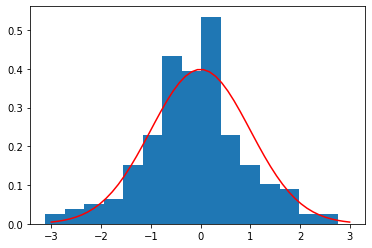

In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

'''
norm.cdf 返回对应的累计分布函数值
norm.pdf 返回对应的概率密度函数值
norm.rvs 产生指定参数的随机变量
norm.fit 返回给定数据下，各参数的最大似然估计（MLE）值
'''
x_norm = norm.rvs(size=200)
#在这组数据下，正态分布参数的最大似然估计值
x_mean, x_std = norm.fit(x_norm)
print ('mean, ', x_mean)
print ('x_std, ', x_std)
plt.hist(x_norm, normed=True, bins=15)#归一化直方图（用出现频率代替次数），将划分区间变为 20（默认 10）
x = np.linspace(-3,3,50)#在在(-3,3)之间返回均匀间隔的50个数字。
plt.plot(x, norm.pdf(x), 'r-')
plt.show()

从两个例子可以看到，求最大似然估计量$\hat\theta$的一般步骤：

    （1）写出似然函数；
    （2）对似然函数取对数，并整理；
    （3）求导数；
    （4）解似然方程。
    
最大似然估计的特点：

    （1）比其他估计方法更加简单；
    （2）收敛性：无偏或者渐近无偏，当样本数目增加时，收敛性质会更好；
    （3）如果假设的类条件概率模型正确，则通常能获得较好的结果。但如果假设模型出现偏差，将导致非常差的估计结果。

# 半朴素贝叶斯分类器

## 基本思想

朴素贝叶斯中中，为了计算方便，假设各个属性之间互不干扰，是独立的。但是在实际应用中，属性之间是有关联的，于是人们对属性独立性假设适当放松，合理考虑一部分属性之间的、比较强的相互依赖信息，提出了半朴素贝叶斯分类器的学习方法。

为了计算量不至于太大，假定每个属性在类别之外，最多仅依赖一个其他属性。即$$P(c|x)\propto P(c)\prod_{i=1}^{d}P(x_i|c,pa_i)$$
假设父属性$pa_i$已知，那么可使用下面的公式估计$P(x_i|c,pa_i)$：
$$P(x_i|c,pa_i)=\frac{P(x_i,c,pa_i)}{P(c,pa_i)}$$


其中，$pa_i$为属性$x_i$所依赖的属性，称为$x_i$的父属性于是，问题就转化为如何确定每个属性的父属性，不同的做法产生不同的独依赖分类器。如图有三种方法：![jupyter](./img/bys-2.png)
NB就是朴素贝叶斯分类器。最简单的方法是如图（b）所示的SPODE，假设所有属性都依赖于同一个属性（超父， super-parent），然后通过交叉验证确定超父，$x_1$为超父属性。

TAN方法中，每个属性依赖的另外的属性由最大带权生成树来确定。它是在最大带权生成树算法的基础上，通过某种规则生成一个树即TAN树。

## 树增广朴素贝叶斯网络分类器TAN
TAN(Tree Augmented naive Bayes)在最大带权生成树（maximum weighted spanning tree）算法的基础上，通过下面的步骤将属性间的依赖关系简化为如图所示的树形结构(TAN: Tree Augmented Naive Bayes) 

（1） 计算任意两个属性之间的条件互信息作为它们之间的权值。互信息值的标准公式如下：$$I(x_i,x_j|y)=\sum_{x_i,x_j;c\in Y}P(x_i,x_j|c)log\frac{P(x_i,x_j|c)}{P(x_i|c)P(x_j|c)}$$

（2）以属性为节点构建完全图，任意两个节点之间的权重设为$I(x_i,x_j|y)$。然后用最大带权生成树算法求得此图的最大带权的生成树。

（3）构建此完全树最大带权生成树，挑选根变量，将边置为有向。

（4）加入类节点y，增加从y到每个属性的有向边。

互信息值是信息论中一个有用的信息度量。它可以看出是一个信息量里包含另一个随机变量的信息量。用图线来表示就是下面这样。![jupyter](./img/bys-3.png)

中间的I(x;y)就是互信息值，X,Y代表的2种属性。于是下面这个属性就很好理解了，互信息值越大，就代表2个属性关联性越大。容易看出，条件互信息$I(x_i,x_j|y)$刻画了属性$x_i$和$x_j$在已知类别的情况下的相关性，通过最大生成树算法，TAN树仅保留了强相关属性之间的依赖性。
![jupyter](./img/bys-4.jpg)


## 平均一依赖估测器学习算法AODE
平均一依赖估测器AODE(Averaged One-Dependent Estimator)是一种基于集成学习机制、更为强大的独依赖分类器，与SPODE通过模型选择确定超父属性不同，AODE尝试将每个属性作为超父来构建SPODE。然后将这些具有足够训练数据支持的SPODE集成起来作为最终结果

即： $$P(c|x)\propto \sum_{i=1,|D_{x_i}|\geq m^{'}}^dP(c,x_i)\prod_{j=1}^{d}P(x_j|c,x_i)$$其中$|D_{x_i}|$是在第i个属性上取值为$x_i$的样本的集合，$m^{'}$是阈值常数。显然AODE需要估计$P(c,x_i)$和$P(x_j|c,x_i)$。类似公式4，有$$\hat P(c,x_i)=\cfrac{|D_{c,x_i}|+1}{|D|+N_i}$$$$\hat P(x_j|c,x_i)=\cfrac{|D_{c,x_i,x_j}|+1}{|D_{c,x_i}|+N_j}$$

$N_i$是第i个属性可能的取值数，$D_{c,x_i}$是类别为c且在第i个属性上取值为$x_i$的样本的集合，$D_{c,x_i,x_j}$是类别为c，且在第i和第j个属性上取值分别为$x_i、x_j$的样本的集合。例如，对西瓜数据，有：$$\hat P_{是，浊响}=\hat P(好瓜=是,敲声=浊响)=\cfrac{6+1}{17+3}=0.350$$$$\hat P_{凹陷|是，浊响}=\hat P(脐部=凹陷|好瓜=是,敲声=浊响)=\cfrac{3+1}{6+3}=0.444$$
![jupyter](./img/bys-5.jpg)

可以看出，AODE的训练过程也是“计数”。但是AODE无需模型选择，既能通过预计算节省预测时间，也能采取懒惰学习方法在预测时再进行计算，并且易于实现增量式学习。

独依赖时依赖于最多一个其他属性。如果训练数据非常充分，可以考虑二阶、三阶等高阶依赖，来进一步提升泛化性能；若样本有限，则高阶联合计算将是一个泥沼。